# **Introduction to Data Science: (2021)**

## Project done by **Albert Sayapin** and **Sergei Nikodimov** 

## Grading details:

1. Describe the *problem* you want to solve. *Why* is it *important*? *Why* do we want to use *Machine Learning*? (Task 1)
2. *Load* the data using pandas and *split* the data frame into X (*inputs*) and y (*outputs*). (Task 2)
3. *Prepare* your *dataset*:
   1. encode categorical variables(if any); Explain. (Task 3.1)
   2. handle missing variables (if any); Explain. (Task 3.2)
   3. generate new features (if useful); Explain. (Task 3.3)
   4. preprocess target (if needed); Explain. (Task 3.4)
4. Perform EDA via visualization with Seaborn:
   1. try to find patterns to make ML task more specific / to help with selection and tuning ML models. (Task 4.1)
   2. preprocess your data if your findings suggest this; Explain. (Task 4.2)
   3. after you can select tagret changes; Explain. (Task 4.3)
5. Training:
   1. build a proper cross-validation procedure; Explain. (Task 5.1)
   2. select an appropriate measure of quality; Explain. (Task 5.2)
   3. choose an ML model; Explain. (Task 5.3) 
   4. look for a good set of hyperparameters. (Task 5.4)
   5. use the prepared cv procedure to estimate the quality of prediction. (Task 5.5)
6. Analyze the obtained results and make final conclusion:
   1. interesting findings, remarks on ML experiments; (Task 6.1)
   2. the applicability of the model in a real-life scenario; (Task 6.2)
   3. does your model solve the problem stated at the beginning? (Task 6.3)
   4. Can you estimate the impact of your ML model on the problem domain (Task 6.4)


## <u>Task 1.</u>
Our problem is to predict the likelihood of a person getting seasonal and h1n1 vaccinations based on a set of personal data. This problem is especially important for the health care system, since it is very often necessary to know the rate of vaccination in order to make the required amount of vaccines and also prevent the spread of the epidemic. We want to use machine learning to try and predict the most likely choice of a person in terms of vaccination in a good enough way. We can use machine learning techniques to solve this problem because it is repetitive issue (happens periodically) and we also have a lot of data on this problem, that is why ML is suitable here.

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

# **Work with the data:**

## *Load the data:*
### You can get the data from https://www.drivendata.org/competitions/66/flu-shot-learning/

## <u>Task 2. Look at one Cell below.</u>
Our I / O data was already split, so we just gave them names.

In [2]:
train_data = pd.read_csv("training_set_features.csv", index_col=0)
train_target = pd.read_csv("training_set_labels.csv", index_col=0)

## *Look at the data and deal with missing values:*

### Features:

In [3]:
train_data.shape

(26707, 35)

In [4]:
train_data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [6]:
train_data.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [7]:
train_data.select_dtypes(include="float64").describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,24547.0,0.220312,0.414466,0.0,0.0,0.0,0.0,1.0


## <u>Task (3.2). Look at one Cell below.</u>
All missing values   in float columns have been filled with the median value of this column. We considered this to be the best approximation method when we work with discrete variables and do not want to lose information by dropping rows.
All Nan values   in the columns with the object data type were filled based on other columns in which all the values   were present. For example, we mapped Nans to one of the educational classes based on age_group because there is a correlation between education level and age. Because we thought it was better than dropping rows.

In [8]:
# Fill in Nans in float columns with median values because it is the best approximation
# when you work with descrete variables and do not want to lose information dropping rows:

float_cols = train_data.select_dtypes(include="float64").columns
float_medians = train_data[float_cols].median()

train_data[float_cols] = train_data[float_cols].fillna(float_medians)

In [9]:
train_data.select_dtypes(include="object").describe().T

,count,unique,top,freq
age_group,26707,5,65+ Years,6843
education,25300,4,College Graduate,10097
race,26707,4,White,21222
sex,26707,2,Female,15858
income_poverty,22284,3,"<= $75,000, Above Poverty",12777
marital_status,25299,2,Married,13555
rent_or_own,24665,2,Own,18736
employment_status,25244,3,Employed,13560
hhs_geo_region,26707,10,lzgpxyit,4297
census_msa,26707,3,"MSA, Not Principle City",11645


In [10]:
def bar_plot_value_counts(df, column, title):
    """
        Helper function to plot some results
    """

    df[column].value_counts().plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title(title)

### <u>"age_group":</u>
### We have all the data, hence we will make it dummy_vals.

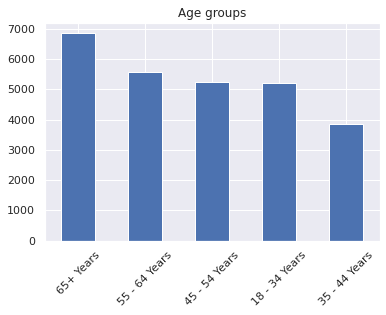

In [11]:
bar_plot_value_counts(train_data, "age_group", "Age groups")

### <u>"education":</u>
### We need to fill in NaNs in some way.

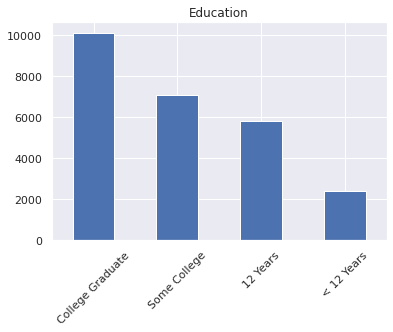

In [12]:
bar_plot_value_counts(train_data, "education", "Education")

In [13]:
train_data.groupby("age_group").apply(lambda x: x["education"].value_counts().idxmax())

age_group
18 - 34 Years    College Graduate
35 - 44 Years    College Graduate
45 - 54 Years    College Graduate
55 - 64 Years    College Graduate
65+ Years        College Graduate
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [14]:
# We will map Nans to one of the educational classes based on age_group
# because there is correlation between education level and age;
# and it is better than to drop rows or fill Nans with one predefined value

age_group2education = (
    train_data.groupby("age_group")
    .apply(lambda x: x["education"].value_counts().idxmax())
)

mask = train_data["education"].isna()
train_data["education"][mask] = train_data["age_group"][mask].apply(lambda x: age_group2education[x])

### <u>"race"</u> and <u>"sex"</u>:
### We have all the data, hence we will make it dummy_vals:

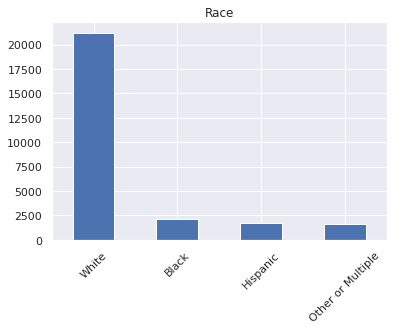

In [15]:
bar_plot_value_counts(train_data, "race", "Race")

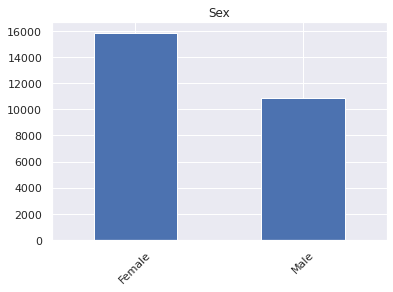

In [16]:
bar_plot_value_counts(train_data, "sex", "Sex")

### <u>"income_poverty"</u>:
### We need to fill in NaNs in some way.

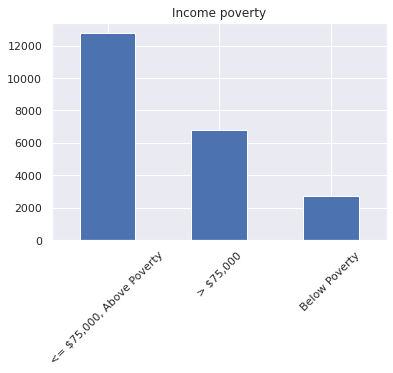

In [17]:
bar_plot_value_counts(train_data, "income_poverty", "Income poverty")

In [18]:
train_data.groupby("education").apply(lambda x: x["income_poverty"].value_counts().idxmax())

education
12 Years            <= $75,000, Above Poverty
< 12 Years          <= $75,000, Above Poverty
College Graduate                    > $75,000
Some College        <= $75,000, Above Poverty
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [19]:
# We will map Nans to one of the income classes based on education
# because there is correlation between education level and income;
# and it is better than to drop rows or fill Nans with one predefined value

education2income = (
    train_data.groupby("education")
    .apply(lambda x: x["income_poverty"].value_counts().idxmax())
)

mask = train_data["income_poverty"].isna()
train_data["income_poverty"][mask] = train_data["education"][mask].apply(lambda x: education2income[x])

### <u>"marital_status"</u>:
### We need to fill in NaNs in some way.

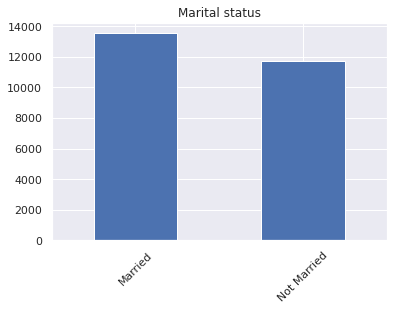

In [20]:
bar_plot_value_counts(train_data, "marital_status", "Marital status")

In [21]:
(
    train_data.groupby(["age_group"])
    .apply(lambda x: x["marital_status"].value_counts().idxmax())
)

age_group
18 - 34 Years    Not Married
35 - 44 Years        Married
45 - 54 Years        Married
55 - 64 Years        Married
65+ Years        Not Married
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [22]:
# We will map Nans to one of the marital statuses based on age group
# because there is correlation between marital status and age;
# and it is better than to drop rows or fill Nans with one predefined value

age_group2marital_stat = (
    train_data.groupby(["age_group"])
    .apply(lambda x: x["marital_status"].value_counts().idxmax())
)

mask = train_data["marital_status"].isna()
train_data["marital_status"][mask] = train_data["age_group"][mask].apply(lambda x: age_group2marital_stat[x])

### <u>"rent_or_own"</u>:
### We need to fill in NaNs in some way.

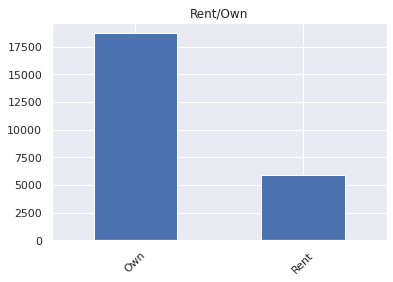

In [23]:
bar_plot_value_counts(train_data, "rent_or_own", "Rent/Own")

In [24]:
(
    train_data.groupby(["age_group"])
    .apply(lambda x: x["rent_or_own"].value_counts().idxmax())
)

age_group
18 - 34 Years    Own
35 - 44 Years    Own
45 - 54 Years    Own
55 - 64 Years    Own
65+ Years        Own
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [25]:
# We will map Nans to one of the rent statuses based on age group
# because there is correlation between possibility to rent/own and age;
# and it is better than to drop rows or fill Nans with one predefined value

age_group2rent_own = (
    train_data.groupby(["age_group"])
    .apply(lambda x: x["rent_or_own"].value_counts().idxmax())
)

mask = train_data["rent_or_own"].isna()
train_data["rent_or_own"][mask] = train_data["age_group"][mask].apply(lambda x: age_group2rent_own[x])

### <u>"employment_status"</u>:
### We need to fill in NaNs in some way.

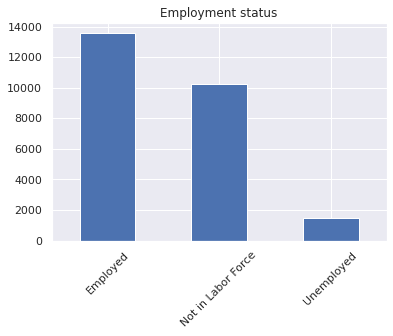

In [26]:
bar_plot_value_counts(train_data, "employment_status", "Employment status")

In [27]:
(
    train_data.groupby(["age_group"])
    .apply(lambda x: x["employment_status"].value_counts().idxmax())
)

age_group
18 - 34 Years              Employed
35 - 44 Years              Employed
45 - 54 Years              Employed
55 - 64 Years              Employed
65+ Years        Not in Labor Force
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [28]:
# We will map Nans to one of the employment statuses based on age group
# because there is correlation between employment status  and age;
# and it is better than to drop rows or fill Nans with one predefined value


age_group2emp_stat = (
    train_data.groupby(["age_group"])
    .apply(lambda x: x["employment_status"].value_counts().idxmax())
)

mask = train_data["employment_status"].isna()
train_data["employment_status"][mask] = train_data["age_group"][mask].apply(lambda x: age_group2emp_stat[x])

### <u>"employment_industry"</u>:
### We need to fill in NaNs in some way.

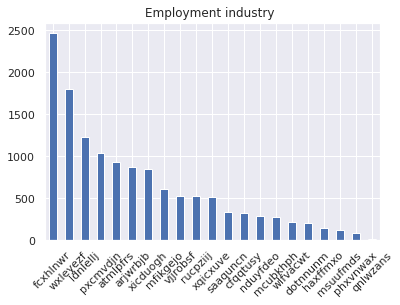

In [29]:
bar_plot_value_counts(train_data, "employment_industry", "Employment industry ")

In [30]:
(
    train_data.groupby(["education"])
    .apply(lambda x: x["employment_industry"].value_counts().idxmax())
)

education
12 Years            fcxhlnwr
< 12 Years          xicduogh
College Graduate    wxleyezf
Some College        fcxhlnwr
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [31]:
# We will map Nans to one of the employment industries based on education
# because there is correlation between employment industry and education;
# and it is better than to drop rows or fill Nans with one predefined value


education2emp_idstry = (
    train_data.groupby(["education"])
    .apply(lambda x: x["employment_industry"].value_counts().idxmax())
)

mask = train_data["employment_industry"].isna()
train_data["employment_industry"][mask] = train_data["education"][mask].apply(lambda x: education2emp_idstry[x])

### <u>"employment_occupation"</u>:
### We need to fill in NaNs in some way.

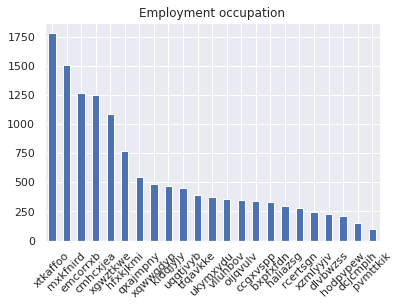

In [32]:
bar_plot_value_counts(train_data, "employment_occupation", "Employment occupation")

## <u>Task (3.2). Look at one Cell below.</u>

In [33]:
# We will map Nans to one of the employment occupations based on employment industry
# because there is correlation between employment industry and occupation;
# and it is better than to drop rows or fill Nans with one predefined value

idstry2occup = (
    train_data.groupby(["employment_industry"])
    .apply(lambda x: x["employment_occupation"].value_counts().idxmax())
)

mask = train_data["employment_occupation"].isna()
train_data["employment_occupation"][mask] = train_data["employment_industry"][mask].apply(lambda x: idstry2occup[x])

### <u>"hhs_geo_region"</u>:
### We have all the data, hence we will make it dummy_vals:

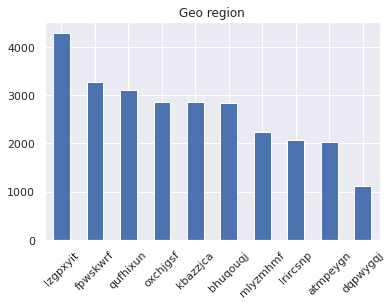

In [34]:
bar_plot_value_counts(train_data, "hhs_geo_region", "Geo region")

In [35]:
train_data.count().min()

26707

### Labels:

In [36]:
train_target.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_vaccine,26707.0,0.212454,0.409052,0.0,0.0,0.0,0.0,1.0
seasonal_vaccine,26707.0,0.465608,0.498825,0.0,0.0,0.0,1.0,1.0


## <u>Task (3.4). Look at one Cell below.</u>
We have split the target data for seasonal vaccination and h1n1 so that they can be tested in parallel.

In [37]:
# We divide multilabel target into 2 distinct targets to be able to experiment simultaneously.
# Besides we think that it would help us to find more accurate model as a combination of 2 separate ones
# that are likely to have different global parameters

train_target_seasonal = train_target["seasonal_vaccine"]
train_target_h1n1 = train_target["h1n1_vaccine"]

## *Create some features:*

### custom features:

## <u>Task (3.3). Look at the next 4 cells below.</u>
We made a new feature which is the sum of all columns whose names start with "behavioral" and named its level of health responsibility.

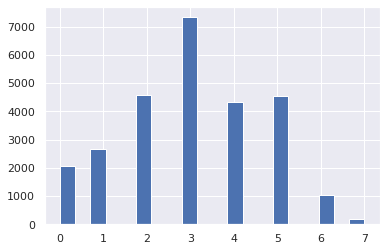

In [38]:
# Assumption: we can combine all the behavioral features as one feature because
# they are of the same nature, we mean they categorize human health responsibility level
# and if we sum them we will not lose any information 

behavioral_cols = [col for col in train_data.columns if "behavioral" in col]
train_data[behavioral_cols].sum(axis=1).hist(bins=20);

In [39]:
train_data["health_responsibility_level"] = train_data[behavioral_cols].sum(axis=1)

In [40]:
pd.concat([train_data[behavioral_cols], train_target], axis=1).corr(method='pearson').iloc[:-2, -2:]

,h1n1_vaccine,seasonal_vaccine
behavioral_antiviral_meds,0.040226,0.006013
behavioral_avoidance,0.046837,0.076130
behavioral_face_mask,0.070413,0.050020
behavioral_wash_hands,0.074570,0.112254
behavioral_large_gatherings,0.018089,0.063722
behavioral_outside_home,0.022080,0.053287
behavioral_touch_face,0.070855,0.119925


In [41]:
pd.concat([train_data["health_responsibility_level"], train_target], axis=1).corr(method='pearson').iloc[:1, -2:]

,h1n1_vaccine,seasonal_vaccine
health_responsibility_level,0.079923,0.126401


### Hence we have higher correlation scores for our new variable and it could improve prediction/generalization results

### dummy features:

## <u>Task (3.1). Look at the next 2 Cells below.</u>
All columns with data types of the object were divided using dummy columns. We did this in order for our model to be able to handle this type of data.

In [42]:
dummy_cols = train_data.select_dtypes(include="object").columns.tolist()
train_data[dummy_cols].nunique().sum()

82

In [43]:
train_data = pd.concat([train_data, pd.get_dummies(train_data[dummy_cols])], axis=1)
train_data = train_data.drop(columns=dummy_cols)

# **Models Comparison:**

In [44]:
def experiment(overall_parameters, x_train, x_test, y_train, y_test, cv=5, scoring='roc_auc', v=1):
    results_dict = {}
    for model_key, model_params in overall_parameters.items():
        print(f"{model_key}:")
        
        pipe = Pipeline(steps=model_params['estimators'])
        clf = GridSearchCV(pipe, model_params['param_grid'], cv=cv, scoring=scoring, n_jobs=-1, verbose=v)
        clf.fit(x_train, y_train)
        results_dict[model_key] = []
        results_dict[model_key].append(clf.best_score_)
        results_dict[model_key].append(clf.best_params_)

        print("Best parameter (CV score=%0.3f):" % clf.best_score_)
        print(clf.best_params_)

        clf.best_estimator_.fit(x_train, y_train)
        pred = clf.best_estimator_.predict_proba(x_test)
        score = roc_auc_score(y_test, pred[:, 1])
        results_dict[model_key].append(score)
        print(f"Final roc_auc_score = {score}")
    return results_dict

## Seasonal:

### split the data on train and test:

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data, train_target_seasonal, test_size=0.3,
    random_state=42, shuffle=True,
    stratify=train_target_seasonal,
)

x_test.shape[0]/train_data.shape[0]

0.3000336990302168

## <u>Task (4.1-2). Look at the next cells below.</u>
 Explanation: As we have to make our problem more specific, we saved all the rows with the help of nan changing.
 However now we have got too many columns to proceed. That is why we need some more preprocessing steps.
 
 **Firstly**, it is *PCA*, that can help us preserve all the most important features and help computationally.
 
 **Secondly**, it is *Standart Scaler*, that can help to train models like KNN and Logistic Regression.

## <u>Task (5.1-5). Look at the next cells below.</u>
1. We use CV with 5 folds to be able to evaluate models' generalization abilities, because it is not so computationally hard and is a standard number.
2. To evaluate our models we use roc auc metric because we have to identify the probability the person uses the vaccine(h1n1 or seasonal) and this metric is a good fit here.
3. We choose between some standard models that that can solve classification task and try to find the best by evaluation experiments.
4. Below we look for the best set of parameters.
5. Below we estimate the quality of our model.

In [46]:
estimators_base = [
    ('reduce_dim', PCA()),
    ('scaler', StandardScaler()),
]

pca_n_components = [rank for rank in range(10, 50, 10)]
C = [0.1, 0.15, 0.2, 0.3, 0.5, 0.7, 0.8]
n_neighbors = [10, 20, 30]
p = [1, 2]

overall_parameters = {
    'lr': {
        'estimators': [
            *estimators_base,
            ('lr', LogisticRegression(max_iter=5000, random_state=42)),
        ],
        'param_grid': {
            'reduce_dim__n_components': pca_n_components,
            'lr__C': C,
        }
    },
    'knn': {
        'estimators': [
            *estimators_base,
            ('knn', KNeighborsClassifier()),
        ],
        'param_grid': {
            'reduce_dim__n_components': pca_n_components,
            'knn__n_neighbors': n_neighbors,
            'knn__weights': ['uniform', 'distance'],
            'knn__p': p,
        }
    },
    'dtc': {
        'estimators': [
            *estimators_base,
            ('dtc', DecisionTreeClassifier(random_state=42)),
        ],
        'param_grid': {
            'reduce_dim__n_components': pca_n_components[1:],
            'dtc__max_depth': [5, 10, 20, 30],
            'dtc__max_features': ['auto', 20],
        }
    },
    'svc': {
        'estimators': [
            *estimators_base,
            ('svc', SVC(probability=True, gamma='auto', random_state=42)),
        ],
        'param_grid': {
            'reduce_dim__n_components': pca_n_components[:-2],
            'svc__C': C[2:5],
        }
    },
    'rfc': {
        'estimators': [
            *estimators_base,
            ('rfc', RandomForestClassifier(random_state=42)),
        ],
        'param_grid': {
            'reduce_dim__n_components': pca_n_components,
            'rfc__n_estimators': [550, 600],
            'rfc__max_depth': [10, 12],
        }
    },
    'gnb': {
        'estimators': [
            *estimators_base,
            ('gnb', GaussianNB()),
        ],
        'param_grid': {
            'reduce_dim__n_components': pca_n_components,
        }
    },
    'mlp': {
        'estimators': [
            *estimators_base,
            ('mlp', MLPClassifier(max_iter=800, random_state=42)),
        ],
        'param_grid': {
            'reduce_dim__n_components': pca_n_components,
            'mlp__alpha': [1e-4, 1e0],
        }
    }

}

In [47]:
results_dict_seasonal = experiment(overall_parameters, x_train, x_test, y_train, y_test, cv=5, scoring='roc_auc', v=1)

lr:
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameter (CV score=0.846):
{'lr__C': 0.7, 'reduce_dim__n_components': 40}
Final roc_auc_score = 0.8418030460670668
knn:
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameter (CV score=0.806):
{'knn__n_neighbors': 30, 'knn__p': 1, 'knn__weights': 'distance', 'reduce_dim__n_components': 20}
Final roc_auc_score = 0.8031187379280931
dtc:
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameter (CV score=0.762):
{'dtc__max_depth': 5, 'dtc__max_features': 20, 'reduce_dim__n_components': 30}
Final roc_auc_score = 0.7513597150050368
svc:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameter (CV score=0.841):
{'reduce_dim__n_components': 20, 'svc__C': 0.3}
Final roc_auc_score = 0.8394234978632513
rfc:
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter (CV score=0.834):
{'reduce_dim__n_components': 40, 'rfc__max_depth': 12, 'rfc__n_estim

## H1N1:

In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data, train_target_h1n1, test_size=0.3,
    random_state=42, shuffle=True,
    stratify=train_target_seasonal,
)

In [49]:
results_dict_h1n1 = experiment(overall_parameters, x_train, x_test, y_train, y_test, cv=5, scoring='roc_auc', v=1)

lr:
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameter (CV score=0.810):
{'lr__C': 0.8, 'reduce_dim__n_components': 40}
Final roc_auc_score = 0.8103137593642866
knn:
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameter (CV score=0.778):
{'knn__n_neighbors': 30, 'knn__p': 2, 'knn__weights': 'distance', 'reduce_dim__n_components': 20}
Final roc_auc_score = 0.770195039805348
dtc:
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameter (CV score=0.727):
{'dtc__max_depth': 5, 'dtc__max_features': 20, 'reduce_dim__n_components': 20}
Final roc_auc_score = 0.7299288621184892
svc:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameter (CV score=0.796):
{'reduce_dim__n_components': 20, 'svc__C': 0.2}
Final roc_auc_score = 0.7817395273660954
rfc:
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter (CV score=0.799):
{'reduce_dim__n_components': 20, 'rfc__max_depth': 12, 'rfc__n_estima

/home/albert/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameter (CV score=0.817):
{'mlp__alpha': 1.0, 'reduce_dim__n_components': 30}
Final roc_auc_score = 0.8151042937024622


# Final Model:

In [77]:
print("Models quality on Seasonal data:")
pd.Series({key: val[2] for key, val in results_dict_seasonal.items()}, name="SEASONAL").sort_values(ascending=False)

Models quality on Seasonal data:


mlp    0.846481
lr     0.841803
svc    0.839423
rfc    0.831018
gnb    0.825290
knn    0.803119
dtc    0.751360
Name: SEASONAL, dtype: float64

In [78]:
print("Models quality on H1N1 data:")
pd.Series({key: val[2] for key, val in results_dict_h1n1.items()}, name="H1N1").sort_values(ascending=False)

Models quality on H1N1 data:


mlp    0.815104
lr     0.810314
gnb    0.799833
rfc    0.794360
svc    0.781740
knn    0.770195
dtc    0.729929
Name: H1N1, dtype: float64

In [103]:
results_dict_seasonal["mlp"][1], results_dict_h1n1["mlp"][1]

({'mlp__alpha': 1.0, 'reduce_dim__n_components': 40},
 {'mlp__alpha': 1.0, 'reduce_dim__n_components': 30})

In [127]:
class FluVaccinationModel:
    
    def __init__(self, h1n1_params, season_params):
        self.h1n1_model_params = {key.split("__")[-1]: val for key, val in h1n1_params.items() if 'mlp' in key}
        self.h1n1_pca_params = {key.split("__")[-1]: val for key, val in h1n1_params.items() if 'reduce_dim' in key}
        
        self.season_model_params = {key.split("__")[-1]: val for key, val in season_params.items() if 'mlp' in key}
        self.season_pca_params = {key.split("__")[-1]: val for key, val in season_params.items() if 'reduce_dim' in key}
        
        est_seasonal = [
            ('reduce_dim', PCA(**self.season_pca_params)),
            ('scaler', StandardScaler()),
            ('mlp', MLPClassifier(**self.season_model_params, max_iter=800, random_state=42))
        ]

        est_h1n1 = [
            ('reduce_dim', PCA(**self.h1n1_pca_params)),
            ('scaler', StandardScaler()),
            ('mlp', MLPClassifier(**self.h1n1_model_params, max_iter=800, random_state=42))
        ]
        
        self.model_seasonal = Pipeline(steps=est_seasonal)
        self.model_h1n1 = Pipeline(steps=est_h1n1)
    
    def fit(self, x_train, y_train):
        self.model_seasonal.fit(x_train, y_train["seasonal_vaccine"])
        self.model_h1n1.fit(x_train, y_train["h1n1_vaccine"])
    
    def predict_proba(self, x, mode="seasonal"):
        if mode == "seasonal":
            return self.model_seasonal.predict_proba(x)
        elif mode == "h1n1":
            return self.model_h1n1.predict_proba(x)
        else:
            assert False

In [128]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data, train_target, test_size=0.3,
    random_state=42, shuffle=True,
    stratify=train_target,
)

In [130]:
model = FluVaccinationModel(results_dict_h1n1["mlp"][1], results_dict_seasonal["mlp"][1])

In [131]:
model.fit(x_train, y_train)

In [132]:
pred = model.predict_proba(x_test, mode="h1n1")
score_h1n1 = roc_auc_score(y_test['h1n1_vaccine'], pred[:, 1])
score_h1n1

0.8170781957751568

In [133]:
pred = model.predict_proba(x_test, mode="seasonal")
score_seasonal = roc_auc_score(y_test['seasonal_vaccine'], pred[:, 1])
score_seasonal

0.851145351612423

In [134]:
(score_h1n1 + score_seasonal) / 2

0.83411177369379

## <u>Task (6.1-4). Look at the next cells below.</u>
1. As a matter of fact we can make more accurate predictions for h1n1 vaccination it can be caused by people are not really aware of that(personally I had known nothing about it before I begin to work with the data)
2. Model can be applied in real-world scenario because it works accurately and can be a good accompaniment and help to experts in the problem domain.
3. Our problem solves the problem stated in the beggining with an accuracy 83%; It is not likely to substitute people's work but can make it easy without any doubt.
4. We think that our model can help scientists as an extra instrument and tool to realize how many people are likely to get vaccinated and plan supplies and solve some economical issues.